In [ ]:
import sys
import numpy as np
import matplotlib.pyplot as plt

sys.path.append("../")

from src import Netlist, LumpedElement, Resistor, Inductor, Capacitor, VoltageSource, WDFScheme

In [2]:
class OutputVoltage:
    def __init__(self, samplerate: int, voltages: np.ndarray | list[float]) -> None:
        self._samplerate: int = samplerate
        self._times: np.ndarray = np.arange(len(voltages)) / samplerate
        self._voltages: np.ndarray = voltages
    
    def show(self) -> None:
        plt.figure(figsize=(10, 6))
        plt.grid()
        plt.plot(self._times, self._voltages)
        plt.xlim(0, max(self._times))
        plt.title("Circuit voltages")
        plt.xlabel("Time [sec]")
        plt.ylabel("Voltage [V]")
        plt.show()

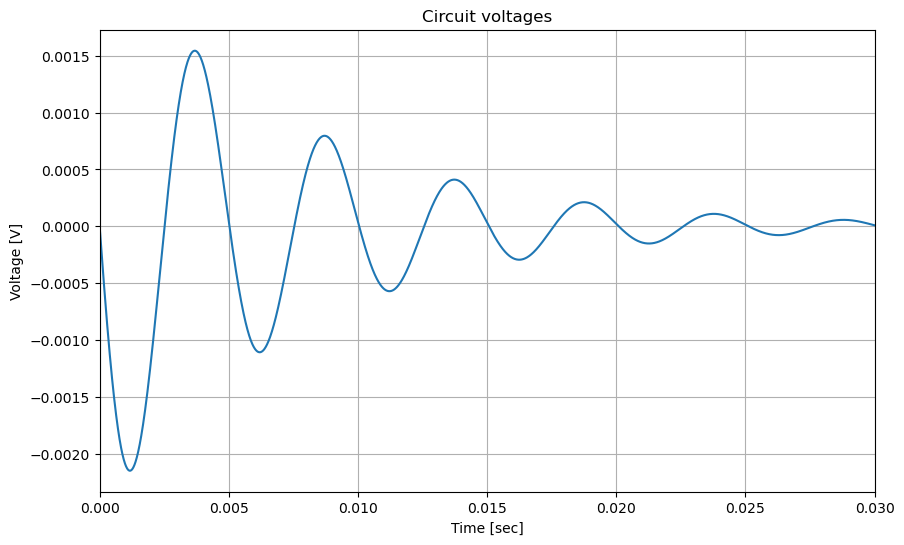

In [3]:
# oscillating circuit
# T = 2 * pi * sqrt(L * C) - Thomson's formula
# let's select L = C, such as T = 0.005 s
T = 0.005
L = C = T / (2 * np.pi)
oscillator: Netlist = Netlist(
    LumpedElement("v", VoltageSource(100), (0, 1)),
    LumpedElement("c", Capacitor(C), (0, 1)),
    LumpedElement("i", Inductor(L), (2, 0)),
    LumpedElement("r", Resistor(0.2), (1, 2))   # resistor to make oscillations fade out
)

samplerate: int = 100000
wdf: WDFScheme = WDFScheme(samplerate, oscillator)
# short impulse to charge capacitor a bit
charge: list = [100] + [0] * 3000
outputs = wdf.process_signal({"v": charge}, keys=["r"])["r"]
OutputVoltage(samplerate, outputs).show()